In [78]:
import uproot
import numpy as np
import pandas as pd
import sklearn.datasets #for iris
from matplotlib.figure import Figure
from collections import Counter
import matplotlib.pyplot as plt
import awkward as ak
import vector

In [2]:
file = uproot.open('saharSL_1_mixed_r000001.root')

In [3]:
file

<ReadOnlyDirectory '/' at 0x7fec2901c370>

In [4]:
file.keys()

['Y4S;1', 'BmDs;1', 'B0Ds;1', 'BmD;1', 'B0D;1']

#### Trees in ROOT are basically just tables of information. Trees are composed of branches or variables, which are the columns of the table. The rows usually represent events (individual bunch crossings)

In [8]:
file = uproot.open('saharSL_1_mixed_r000002.root')
file.classnames()

{'Y4S;1': 'TTree',
 'BmDs;1': 'TTree',
 'B0Ds;1': 'TTree',
 'BmD;1': 'TTree',
 'B0D;1': 'TTree'}

In [9]:
file['Y4S']

<TTree 'Y4S' (847 branches) at 0x7fec48f4cf40>

In [12]:
tree = file['Y4S']
tree.keys()

['__experiment__',
 '__run__',
 '__event__',
 '__production__',
 '__candidate__',
 '__ncandidates__',
 '__weight__',
 'isSignal',
 'mcErrors',
 'mcPDG',
 'ECM',
 'pCM',
 'InvM',
 'cosThCM',
 'phiCM',
 'nROE_Ch',
 'nROE_ECL',
 'nROE_KL',
 'nROE_gam',
 'Q_ROE',
 'M_ROE',
 'Eextra_ROE',
 'R2',
 'cosTBTO',
 'ECM_roegam',
 'phiCM_roegam',
 'cosThCM_roegam',
 'pCM_roepi',
 'phiCM_roepi',
 'cosThCM_roepi',
 'q_roepi',
 'D_B_decayModeID_rank',
 'Y4SScore',
 'Y4SScore4',
 'B0_ECM',
 'B0_pCM',
 'B0_InvM',
 'B0_cosThCM',
 'B0_phiCM',
 'B0_BchiProb',
 'B0_BflightDistance',
 'B0_BflightDistanceErr',
 'B0_B_dr',
 'B0_B_dz',
 'B0_B_x',
 'B0_B_y',
 'B0_B_z',
 'B0_B_x_uncertainty',
 'B0_B_y_uncertainty',
 'B0_B_z_uncertainty',
 'B0_isSignal',
 'B0_mcErrors',
 'B0_mcPDG',
 'B0_genMotherID_0',
 'B0_genMotherPDG_0',
 'B0_genMotherPDG_1',
 'B0_isSignalAcceptMissing',
 'B0_decayModeID',
 'B0_cosBY',
 'B1_ECM',
 'B1_pCM',
 'B1_InvM',
 'B1_cosThCM',
 'B1_phiCM',
 'B1_BchiProb',
 'B1_BflightDistance',
 'B1_Bfl

In [13]:
tree.arrays()

<Array [{__experiment__: 1003, ... ] type='499 * {"__experiment__": int32, "__ru...'>

type= 499 means we have 499 enteries, each entry corresponds to one event. Each entry is a 64-bit floating point numbers.

In [14]:
branches = tree.arrays()
branches['mcPDG']

<Array [nan, 3.01e+05, 3.01e+05, ... nan, nan] type='499 * float64'>

In [59]:
branches = tree.arrays()
branches['InvM']

<Array [7.71, 7.57, 7.29, ... 7.73, 7.72, 7.62] type='499 * float64'>

In [19]:
branches['mcPDG'][498]

nan

In [31]:
Counter(branches['mcPDG'])

Counter({nan: 1,
         300553.0: 174,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
       

In [34]:
for i in range(498):
    print(branches['mcPDG'][i])

nan
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
nan
nan
nan
nan
nan
nan
300553.0
300553.0
nan
nan
300553.0
300553.0
300553.0
300553.0
nan
nan
300553.0
nan
300553.0
nan
nan
300553.0
nan
300553.0
nan
300553.0
nan
nan
nan
nan
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
300553.0
nan
nan
300553.0
nan
300553.0
300553.0
300553.0
300553.0
nan
300553.0
nan
nan
300553.0
nan
nan
300553.0
300553.0
nan
nan
nan
nan
300553.0
300553.0
nan
nan
300553.0
nan
nan
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
nan
300553.0
nan
300553.0
nan
nan
300553.0
300553.0
300553.0
300553.0
300553.0
300553.0
nan
300553.0
nan
nan
300553.0
nan
nan
300553.0
nan
nan
nan
300553.0
nan
nan
nan
nan
nan
300553.0
nan
nan
nan
nan
nan
nan
300553.0
300553.0
nan
300553.0
300553.0
nan
nan
300553.0
nan
nan
300553.0
nan
nan
nan
nan
nan
300553.0
nan
nan
300553.0


$ $
$ $

What if we want to get all of the information about a single event? So far we’ve accessed data in branches by providing a branch name, but we can also just use an event index:


In [38]:
branches[9]
branches[9].tolist()

{'__experiment__': 1003,
 '__run__': 0,
 '__event__': 20533831,
 '__production__': 0,
 '__candidate__': 4,
 '__ncandidates__': 5,
 '__weight__': 1.0,
 'isSignal': 0.0,
 'mcErrors': 508.0,
 'mcPDG': 300553.0,
 'ECM': 7.596520477993235,
 'pCM': 0.9869658505735746,
 'InvM': 7.532706115464376,
 'cosThCM': -0.3236064782228046,
 'phiCM': 1.0776412664073987,
 'nROE_Ch': 0.0,
 'nROE_ECL': 6.0,
 'nROE_KL': 0.0,
 'nROE_gam': 6.0,
 'Q_ROE': 0.0,
 'M_ROE': 0.8409994962973397,
 'Eextra_ROE': 1.1980770869150912,
 'R2': 0.47508031129837036,
 'cosTBTO': 0.8148949146270752,
 'ECM_roegam': 0.5173581252549921,
 'phiCM_roegam': -2.139484353765027,
 'cosThCM_roegam': -0.2277949164875037,
 'pCM_roepi': nan,
 'phiCM_roepi': nan,
 'cosThCM_roepi': nan,
 'q_roepi': nan,
 'D_B_decayModeID_rank': 5.0,
 'Y4SScore': -4.917003333826386e-06,
 'Y4SScore4': 4.917003333826386e-06,
 'B0_ECM': 3.6388150845785145,
 'B0_pCM': 1.3137846704633207,
 'B0_InvM': 3.3942921131694614,
 'B0_cosThCM': -0.7423472440784926,
 'B0_phiCM

(array([  0.,   0.,   0.,   0.,   0., 174.,   0.,   0.,   0.,   0.]),
 array([300552.5, 300552.6, 300552.7, 300552.8, 300552.9, 300553. ,
        300553.1, 300553.2, 300553.3, 300553.4, 300553.5]),
 <BarContainer object of 10 artists>)

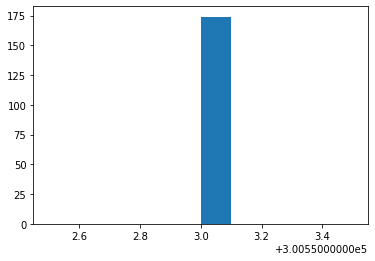

In [42]:
plt.hist(branches['mcPDG'])
plt.show()

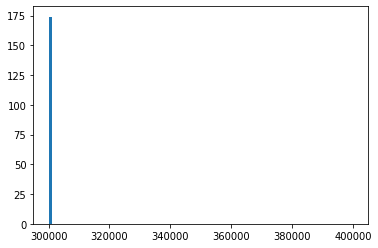

In [52]:
plt.hist(branches['mcPDG'], bins=100, range=(300000, 400000))
plt.show()

## Histogramming a jagged array

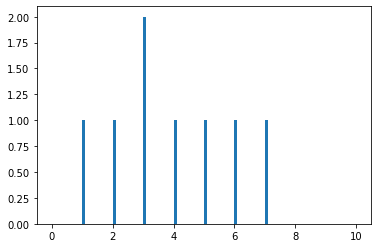

In [57]:
branch = [[1,2,3],[4,5,6],[7,3]]
plt.hist(ak.flatten(branch), bins=100, range=(0, 10))
plt.show()

## Logarithmic scales

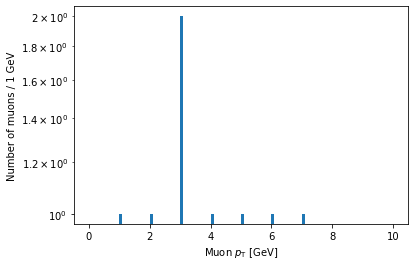

In [61]:
plt.hist(ak.flatten(branch), bins=100, range=(0, 10))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.yscale('log')
plt.show()

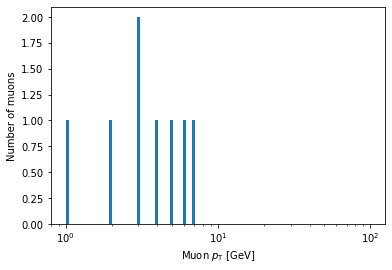

In [63]:
plt.hist(ak.flatten(branch), bins=np.logspace(np.log10(1), np.log10(100), 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.xscale('log')
plt.ylabel('Number of muons')
plt.show()

In [66]:
len(branches)
#len(branches['mcPDG'])

499

In [68]:
branches['mcPDG'] == 300553.0

<Array [False, True, True, ... False, False] type='499 * bool'>

In [69]:
mask = branches['mcPDG'] == 300553.0
np.sum(mask)

174

In [70]:
branches['D_0_0_0_B0_mcECM'][mask]

<Array [nan, nan, nan, ... nan, nan, 0.205] type='174 * float64'>

In [76]:
%%time
x = abs(3+3j)
print(x)

4.242640687119285
CPU times: user 148 µs, sys: 284 µs, total: 432 µs
Wall time: 2.6 ms


~single_muon_mask: This new mask is False only for events with exactly one muon and True otherwise. We can get the intersection of selections with & (the AND operator).

In [80]:
x = [1, 2, 4]
y = [5, 6 , 7]
z = x + y
print(z)

[1, 2, 4, 5, 6, 7]


In [ ]:
class VisualAnalysis:
    def __init__(self): #creates class, waits for GUI controls
        self.org_data = pd.DataFrame()
        self.cut_data = pd.DataFrame()
    def 